# Decision Trees on Donors Choose Dataset</b>

In [101]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<font color='red'><b> TF-IDFW2V</b></font>

<b>Tfidf w2v (w1,w2..) = (tfidf(w1) * w2v(w1) + tfidf(w2) * w2v(w2) + …)  /    (tfidf(w1) + tfidf(w2) + …)</b>

<font color='blue'><b>Glove vectors </b></font>

In [103]:
import pickle
with open('/content/drive/MyDrive/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

or else , you can use below code

# <font color='red'> <b>Task - 1</b></font>

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features +  preprocessed_essay (TFIDF) + Sentiment scores(preprocessed_essay)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features +  preprocessed_essay (TFIDF W2V) + Sentiment scores(preprocessed_essay)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (best `depth` in range [1, 5, 10, 50], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum AUC value</li>
    <li>Find the best hyper paramter using k-fold cross validation.</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>Once after we found the best hyper parameter, we need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <li>Along with plotting ROC curve, we need to print the confusion matrix with predicted and original labels of test data points.
   

# <font color='red'><b> Task - 2 </b></font>

For this task consider **set-1** features.

*  Select all the features which are having non-zero feature importance. We can get the feature importance using  'feature_importances_` 
   (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), discard the all other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM).
*  We need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3<br>
  </li>
    <br>
Summarize the results at the end.
    </li>
</ol>

<font color='blue'><b>Hint for calculating Sentiment scores</b></font>

In [105]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [106]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

#Example
for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

# Task 1

<h1>1. Decision Tree </h1>

## 1.1 Loading Data

In [110]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from tqdm import tqdm
from sklearn.preprocessing import Normalizer
data = pd.read_csv('/content/drive/MyDrive/preprocessed_data.csv',nrows=80000)

In [111]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [112]:
data.head(2)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03


In [113]:
X=data.drop(['project_is_approved'],axis=1)
Y=data['project_is_approved']

In [114]:
X.head(2)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03


In [132]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,stratify=Y)

In [133]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(53600, 8) (53600,) (26400, 8) (26400,)


<h3>Converting school state to one hot representation</h3>

In [134]:
vectorizer=CountVectorizer()
X_train_state=vectorizer.fit_transform(X_train['school_state'])
X_test_state=vectorizer.fit_transform(X_test['school_state'])

print(X_train_state.shape)
print(X_test_state.shape)

(53600, 51)
(26400, 51)


<h3>Converting teacher prefix to one hot representation</h3>

In [135]:
vectorizer=CountVectorizer()
X_train_pre=vectorizer.fit_transform(X_train['teacher_prefix'])
X_test_pre=vectorizer.fit_transform(X_test['teacher_prefix'])
print(X_train_pre.shape)
print(X_test_pre.shape)

(53600, 5)
(26400, 5)


<h3>Converting project_grade_category to one hot representation</h3>

In [136]:
vectorizer=CountVectorizer()
X_train_grade=vectorizer.fit_transform(X_train['project_grade_category'])
X_test_grade=vectorizer.fit_transform(X_test['project_grade_category'])
print(X_train_grade.shape)
print(X_test_grade.shape)

(53600, 4)
(26400, 4)


<h3>Converting clean_categories to one hot representation</h3>

In [137]:
vectorizer=CountVectorizer()
X_train_clean=vectorizer.fit_transform(X_train['clean_categories'])
X_test_clean=vectorizer.fit_transform(X_test['clean_categories'])
print(X_train_clean.shape)
print(X_test_clean.shape)

(53600, 9)
(26400, 9)


<h3>Converting clean_subcategories to one hot representation</h3>

In [138]:
vectorizer=CountVectorizer()
X_train_clean_sub=vectorizer.fit_transform(X_train['clean_subcategories'])
X_test_clean_sub=vectorizer.fit_transform(X_test['clean_subcategories'])
print(X_train_clean_sub.shape)
print(X_test_clean_sub.shape)

(53600, 30)
(26400, 30)


<h3>Encoding Essay</h3>

In [140]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer=TfidfVectorizer(min_df=10,max_features=5000)
vectorizer.fit(X_train['essay'])
X_train_essay=vectorizer.transform(X_train['essay'].values)
X_test_essay=vectorizer.transform(X_test['essay'].values)

print(X_train_essay.shape)
print(X_test_essay.shape)

(53600, 5000)
(26400, 5000)


In [141]:
vectorizer=TfidfVectorizer(min_df=10,max_features=5000)
vectorizer.fit(X_train['essay'])
dictionary = dict(zip(vectorizer.get_feature_names(), list(vectorizer.idf_)))
tfidf_words = set(vectorizer.get_feature_names())

In [143]:
from tqdm import tqdm
import numpy as np

tfidf_w2v_vectors_train=[]
tfidf_w2v_vectors_test=[]

for sentence in tqdm(X_train['essay']):
    vector=np.zeros(300)
    tf_idf_weight=0
    
    for word in sentence.split():
        if (word in glove_words) and (word in tfidf_words):
            vec=model[word]   
            tf_idf=dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector+=(vec*tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight+=tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_train.append(vector)
  
for sentence in tqdm(X_test['essay']):
    vector=np.zeros(300)
    tf_idf_weight=0
    
    for word in sentence.split():
        if (word in glove_words) and (word in tfidf_words):
            vec=model[word]   
            tf_idf=dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector+=(vec*tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight+=tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test.append(vector)

print(len(tfidf_w2v_vectors_train))
print(len(tfidf_w2v_vectors_train[0]))

print(len(tfidf_w2v_vectors_test))
print(len(tfidf_w2v_vectors_test[0]))

100%|██████████| 26400/26400 [00:53<00:00, 492.02it/s]

53600
300
26400
300


<h3>Encoding previously posted projects</h3>

In [144]:
from sklearn.preprocessing import Normalizer
normalizer=Normalizer()

X_train_proj=normalizer.fit_transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_proj=normalizer.fit_transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

print(X_train_proj.shape)
print(X_test_proj.shape)

(1, 53600)
(1, 26400)


<h3>Encoding Price</h3>

In [145]:
from sklearn.preprocessing import Normalizer
normalizer=Normalizer()

X_train_price=normalizer.fit_transform(X_train['price'].values.reshape(1,-1))
X_test_price=normalizer.fit_transform(X_test['price'].values.reshape(1,-1))
print(X_train_price.shape)
print(X_test_price.shape)

(1, 53600)
(1, 26400)


<h3>Encoding Sentiment</h3>

In [146]:
senti_train=[]
senti_test=[]

for sentence in tqdm(X_train['essay']):
  ss=sid.polarity_scores(sentence)
  senti_train.append([ss['neg'],ss['neu'],ss['pos'],ss['compound']])

for sentence in tqdm(X_test['essay']):
  ss=sid.polarity_scores(sentence)
  senti_test.append([ss['neg'],ss['neu'],ss['pos'],ss['compound']])

100%|██████████| 26400/26400 [00:55<00:00, 474.72it/s]


In [147]:
print(len(senti_train),len(senti_test))

53600 26400


In [148]:
senti_train=np.array(senti_train)
senti_test=np.array(senti_test)
print(senti_train.shape,senti_test.shape)

(53600, 4) (26400, 4)


<h3>Concatenating all the features</h3>

In [151]:
from scipy.sparse import hstack

X_train_data1=hstack((X_train_state,X_train_pre,X_train_grade,X_train_clean,X_train_clean_sub,X_train_essay,X_train_proj.T,X_train_price.T,senti_train)).tocsr()
X_train_data2=hstack((X_train_state,X_train_pre,X_train_grade,X_train_clean,X_train_clean_sub,tfidf_w2v_vectors_train,X_train_proj.T,X_train_price.T,senti_train)).tocsr()
X_test_data1=hstack((X_test_state,X_test_pre,X_test_grade,X_test_clean,X_test_clean_sub,X_test_essay,X_test_proj.T,X_test_price.T,senti_test)).tocsr()
X_test_data2=hstack((X_test_state,X_test_pre,X_test_grade,X_test_clean,X_test_clean_sub,tfidf_w2v_vectors_test,X_test_proj.T,X_test_price.T,senti_test)).tocsr()

print(X_train_data1.shape,X_test_data1.shape)
print(X_train_data2.shape,X_test_data2.shape)

(53600, 5105) (26400, 5105)
(53600, 405) (26400, 405)


<h3>Hyperparameter Tuning</h3>

In [152]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

<h2>Set1 data</h2>

In [153]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

parameters={'max_depth':[1,5,10,50],'min_samples_split':[5,10,100,500]}

dt=DecisionTreeClassifier()
clf1=GridSearchCV(dt,parameters,scoring='roc_auc',cv=3,n_jobs=-1,return_train_score=True)
clf1.fit(X_train_data1,Y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 50],
                         '

In [176]:
results1=pd.DataFrame(clf1.cv_results_).groupby(['param_max_depth','param_min_samples_split']).max().unstack()[['mean_train_score','mean_test_score']]
results1

mean_train_score            ... mean_test_score          
param_min_samples_split              5         10   ...             100       500
param_max_depth                                     ...                          
1                               0.551037  0.551037  ...        0.549472  0.549472
5                               0.638788  0.638777  ...        0.618282  0.618313
10                              0.701844  0.700105  ...        0.628255  0.632325
50                              0.925132  0.917065  ...        0.559449  0.603370

[4 rows x 8 columns]

Text(0.5, 1.0, 'AUC CV set')

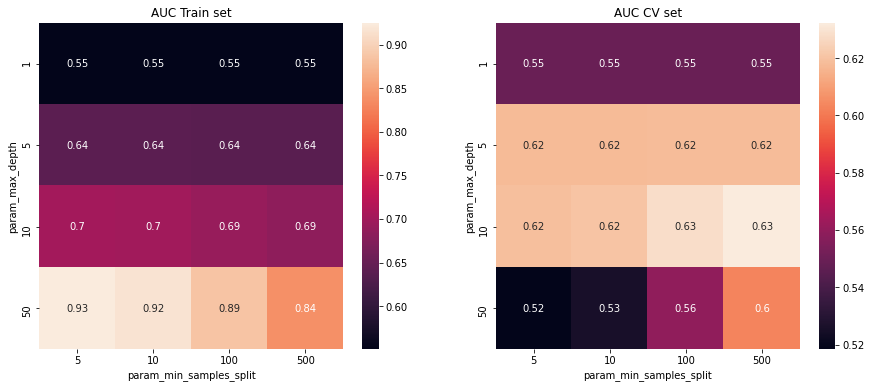

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,2,figsize=(15,6))
sns.heatmap(results1.mean_train_score,annot=True,ax=ax[0])
sns.heatmap(results1.mean_test_score,annot=True,ax=ax[1])

ax[0].set_title('AUC Train set')
ax[1].set_title('AUC CV set')

In [178]:
print(clf1.best_estimator_)
print(clf1.score(X_train_data1,Y_train))
print(clf1.score(X_test_data1,Y_test))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
0.6836477966000618
0.6360187599422474


In [179]:
best_max_depth=10
best_min_samples_split=500

In [184]:
dt=DecisionTreeClassifier(max_depth=best_max_depth,min_samples_split=best_min_samples_split)
dt.fit(X_train_data1,Y_train)

Y_predict_train=dt.predict_proba(X_train_data1)[:,1]
Y_predict_test=dt.predict_proba(X_test_data1)[:,1]

In [186]:
print(Y_predict_train.shape,Y_predict_test.shape)

(53600,) (26400,)


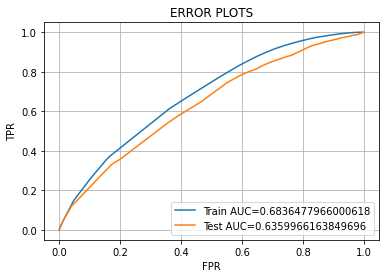

In [188]:
from sklearn.metrics import roc_curve,auc

train_fpr1,train_tpr1,tr_thresholds1=roc_curve(Y_train,Y_predict_train)
test_fpr1,test_tpr1,te_thresholds1=roc_curve(Y_test,Y_predict_test)
plt.plot(train_fpr1,train_tpr1,label='Train AUC='+str(auc(train_fpr1,train_tpr1)))
plt.plot(test_fpr1, test_tpr1,label='Test AUC='+str(auc(test_fpr1,test_tpr1)))
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ERROR PLOTS')
plt.grid()
plt.show()

In [189]:
def find_best_threshold(threshold,fpr,tpr,set_no):
    t=threshold[np.argmax(tpr*(1-fpr))]
    print("The maximum value of tpr*(1-fpr)",max(tpr*(1-fpr)),"for threshold",np.round(t,3),"for set",set_no)
    return t

def predict_with_best_t(proba,threshold):
    predictions=[]
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [208]:
from sklearn.metrics import confusion_matrix

best_t1=find_best_threshold(tr_thresholds1,train_fpr1,train_tpr1,1)

print("Train confusion matrix")
print(confusion_matrix(Y_train,predict_with_best_t(Y_predict_train,best_t1)))

print("Test confusion matrix")
predict1=predict_with_best_t(Y_predict_test,best_t1)
print(confusion_matrix(Y_test,predict_with_best_t(Y_predict_test,best_t1)))

The maximum value of tpr*(1-fpr) 0.391587459101332 for threshold 0.846 for set 1
Train confusion matrix
[[ 5203  3029]
 [17260 28108]]
Test confusion matrix
[[ 2480  1574]
 [ 9502 12844]]


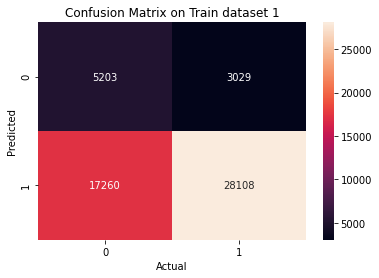

In [209]:
ax=sns.heatmap(np.array(confusion_matrix(Y_train,predict_with_best_t(Y_predict_train,best_t1))),annot=True,fmt="")
ax.set(xlabel='Actual',ylabel='Predicted')
ax.set_title('Confusion Matrix on Train dataset 1')
plt.show()

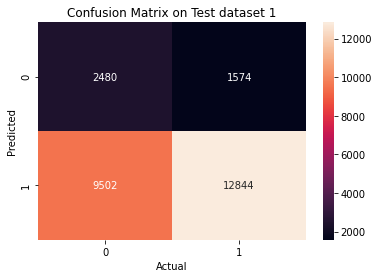

In [210]:
ax=sns.heatmap(np.array(confusion_matrix(Y_test,predict_with_best_t(Y_predict_test,best_t1))),annot=True,fmt="")
ax.set(xlabel='Actual',ylabel='Predicted')
ax.set_title('Confusion Matrix on Test dataset 1')
plt.show()

In [212]:
false_positive=[]
for i in range(len(Y_test)):
  if Y_test.values[i]==0 and predict1[i]==1:
    false_positive+=i,
print(len(false_positive))

1574


In [214]:
fp_essay=[]
for i in false_positive:
  fp_essay+=X_test['essay'].values[i],
print(len(fp_essay))

1574


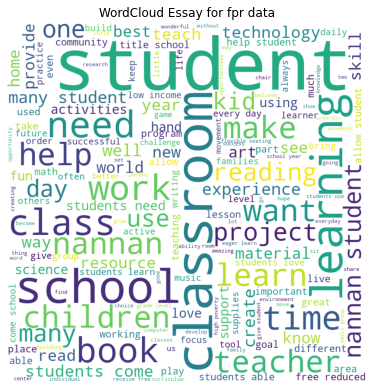

In [239]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
comment_words=''

for val in fp_essay:
    val=str(val)
    tokens=val.split()

    for i in range(len(tokens)):
        tokens[i]=tokens[i].lower()
      
    comment_words+=" ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, background_color ='white',stopwords = stopwords, min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (5,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('WordCloud Essay for fpr data')  
plt.show()

In [217]:
fp_price=[]
for i in false_positive:
  fp_price+=X_test['price'].values[i],
print(len(fp_essay))

1574


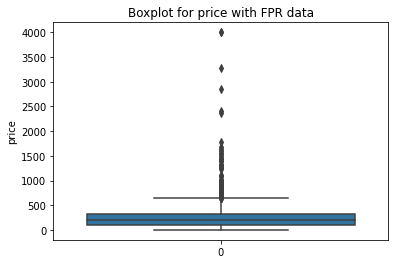

In [238]:
ax=sns.boxplot(data=fp_price)
ax.set(ylabel='price')
ax.set_title('Boxplot for price with FPR data')
plt.show()

In [228]:
prev_post_projects=[]
for i in false_positive:
  prev_post_projects+=X_test['teacher_number_of_previously_posted_projects'].values[i],
print(len(prev_post_projects))

1574


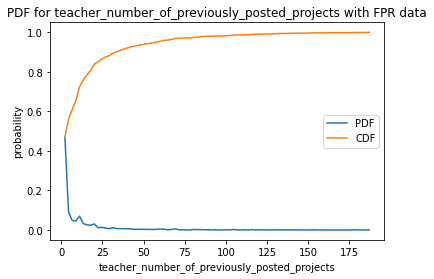

In [237]:
counts, bin_edges = np.histogram(prev_post_projects, bins='auto', density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
pdf=plt.plot(bin_edges[1:],pdf)
cdf=plt.plot(bin_edges[1:],cdf)
plt.legend([pdfP, cdfP], ["PDF", "CDF"])
plt.xlabel('teacher_number_of_previously_posted_projects')
plt.ylabel('probability')
plt.title('PDF for teacher_number_of_previously_posted_projects with FPR data')
plt.show()

<h2>Set2 Data</h2>

In [240]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

parameters={'max_depth':[1,5,10,50],'min_samples_split':[5,10,100,500]}

dt=DecisionTreeClassifier()
clf2=GridSearchCV(dt,parameters,scoring='roc_auc',cv=3,n_jobs=-1,return_train_score=True)
clf2.fit(X_train_data2,Y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 50],
                         '

In [241]:
results2=pd.DataFrame(clf2.cv_results_).groupby(['param_max_depth','param_min_samples_split']).max().unstack()[['mean_train_score','mean_test_score']]
results2

mean_train_score            ... mean_test_score          
param_min_samples_split              5         10   ...             100       500
param_max_depth                                     ...                          
1                               0.559875  0.559875  ...        0.556913  0.556913
5                               0.662444  0.662389  ...        0.626996  0.627095
10                              0.778476  0.776392  ...        0.616479  0.628148
50                              0.999391  0.995771  ...        0.574379  0.617041

[4 rows x 8 columns]

Text(0.5, 1.0, 'AUC CV set')

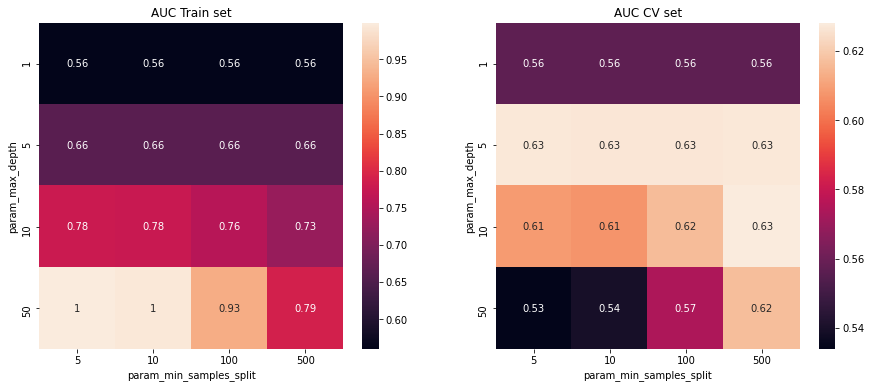

In [242]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,2,figsize=(15,6))
sns.heatmap(results2.mean_train_score,annot=True,ax=ax[0])
sns.heatmap(results2.mean_test_score,annot=True,ax=ax[1])

ax[0].set_title('AUC Train set')
ax[1].set_title('AUC CV set')

In [243]:
print(clf2.best_estimator_)
print(clf2.score(X_train_data2,Y_train))
print(clf2.score(X_test_data2,Y_test))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
0.7211238452386523
0.6196527890218823


In [244]:
best_max_depth=10
best_min_samples_split=500

In [245]:
dt=DecisionTreeClassifier(max_depth=best_max_depth,min_samples_split=best_min_samples_split)
dt.fit(X_train_data2,Y_train)

Y_predict_train=dt.predict_proba(X_train_data2)[:,1]
Y_predict_test=dt.predict_proba(X_test_data2)[:,1]

In [246]:
print(Y_predict_train.shape,Y_predict_test.shape)

(53600,) (26400,)


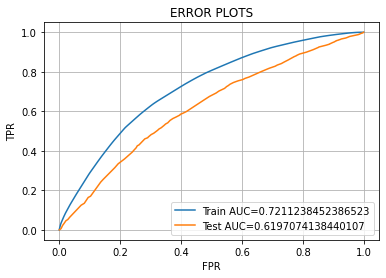

In [247]:
from sklearn.metrics import roc_curve,auc

train_fpr2,train_tpr2,tr_thresholds2=roc_curve(Y_train,Y_predict_train)
test_fpr2,test_tpr2,te_thresholds2=roc_curve(Y_test,Y_predict_test)
plt.plot(train_fpr2,train_tpr2,label='Train AUC='+str(auc(train_fpr2,train_tpr2)))
plt.plot(test_fpr2,test_tpr2,label='Test AUC='+str(auc(test_fpr2,test_tpr2)))
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ERROR PLOTS')
plt.grid()
plt.show()

In [248]:
from sklearn.metrics import confusion_matrix

best_t2=find_best_threshold(tr_thresholds2,train_fpr2,train_tpr2,2)

print("Train confusion matrix")
print(confusion_matrix(Y_train,predict_with_best_t(Y_predict_train,best_t2)))

print("Test confusion matrix")
predict2=predict_with_best_t(Y_predict_test,best_t2)
print(confusion_matrix(Y_test,predict_with_best_t(Y_predict_test,best_t2)))

The maximum value of tpr*(1-fpr) 0.4415881477789494 for threshold 0.846 for set 2
Train confusion matrix
[[ 5575  2657]
 [15786 29582]]
Test confusion matrix
[[ 2443  1611]
 [ 9282 13064]]


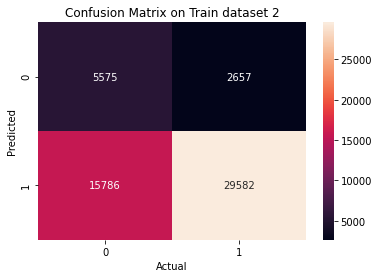

In [249]:
ax=sns.heatmap(np.array(confusion_matrix(Y_train,predict_with_best_t(Y_predict_train,best_t2))),annot=True,fmt="")
ax.set(xlabel='Actual',ylabel='Predicted')
ax.set_title('Confusion Matrix on Train dataset 2')
plt.show()

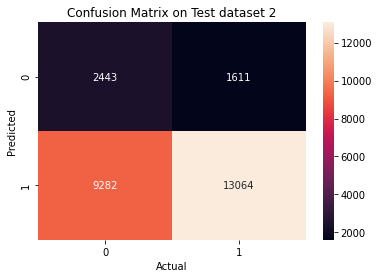

In [250]:
ax=sns.heatmap(np.array(confusion_matrix(Y_test,predict_with_best_t(Y_predict_test,best_t2))),annot=True,fmt="")
ax.set(xlabel='Actual',ylabel='Predicted')
ax.set_title('Confusion Matrix on Test dataset 2')
plt.show()

In [251]:
false_positive=[]
for i in range(len(Y_test)):
  if Y_test.values[i]==0 and predict2[i]==1:
    false_positive+=i,
print(len(false_positive))

1611


In [252]:
fp_essay=[]
for i in false_positive:
  fp_essay+=X_test['essay'].values[i],
print(len(fp_essay))

1611


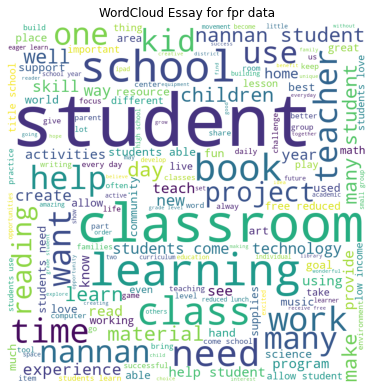

In [253]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
comment_words=''

for val in fp_essay:
    val=str(val)
    tokens=val.split()

    for i in range(len(tokens)):
        tokens[i]=tokens[i].lower()
      
    comment_words+=" ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, background_color ='white',stopwords = stopwords, min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (5,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('WordCloud Essay for fpr data')  
plt.show()

In [254]:
fp_price=[]
for i in false_positive:
  fp_price+=X_test['price'].values[i],
print(len(fp_essay))

1611


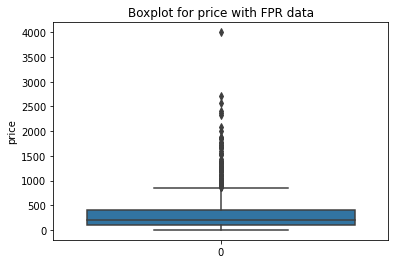

In [255]:
ax=sns.boxplot(data=fp_price)
ax.set(ylabel='price')
ax.set_title('Boxplot for price with FPR data')
plt.show()

In [256]:
prev_post_projects=[]
for i in false_positive:
  prev_post_projects+=X_test['teacher_number_of_previously_posted_projects'].values[i],
print(len(prev_post_projects))

1611


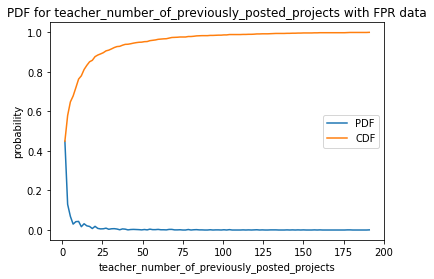

In [257]:
counts, bin_edges = np.histogram(prev_post_projects, bins='auto', density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
pdf=plt.plot(bin_edges[1:],pdf)
cdf=plt.plot(bin_edges[1:],cdf)
plt.legend([pdfP, cdfP], ["PDF", "CDF"])
plt.xlabel('teacher_number_of_previously_posted_projects')
plt.ylabel('probability')
plt.title('PDF for teacher_number_of_previously_posted_projects with FPR data')
plt.show()

#Task 2

In [258]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

parameters={'min_samples_split':[5,10,100,500]}

dt=DecisionTreeClassifier()
clf1=GridSearchCV(dt,parameters,scoring='roc_auc',cv=3,n_jobs=-1,return_train_score=True)
clf1.fit(X_train_data1,Y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'min_samples_split': [5, 10, 100, 500]},
             p

In [259]:
print(clf1.best_estimator_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [261]:
best_min_samples_split=500

In [263]:
dt=DecisionTreeClassifier(max_depth=None,min_samples_split=best_min_samples_split)
dt.fit(X_train_data1,Y_train)


In [266]:
imp_feature=[]
for i in range(len(dt.feature_importances_)):
  if dt.feature_importances_[i]>0:
    imp_feature+=i,
print(len(imp_feature))

1754


In [272]:
print(imp_feature)

[64, 72, 76, 99, 100, 101, 102, 103, 104, 105, 106, 107, 110, 113, 114, 121, 124, 127, 128, 131, 132, 136, 137, 139, 140, 141, 142, 149, 150, 155, 156, 165, 168, 169, 170, 176, 177, 180, 184, 186, 195, 197, 198, 200, 203, 204, 205, 212, 213, 220, 222, 224, 227, 231, 234, 241, 242, 244, 252, 254, 255, 256, 259, 261, 265, 267, 268, 271, 275, 276, 277, 283, 286, 291, 293, 295, 300, 301, 302, 306, 308, 310, 313, 315, 323, 325, 327, 330, 331, 334, 340, 343, 345, 346, 359, 360, 362, 363, 366, 367, 371, 376, 378, 385, 389, 392, 393, 394, 396, 399, 407, 409, 410, 411, 412, 413, 414, 415, 419, 424, 425, 428, 432, 440, 442, 443, 444, 447, 448, 450, 452, 455, 460, 461, 466, 467, 470, 479, 482, 483, 489, 491, 493, 494, 495, 496, 497, 500, 506, 507, 510, 519, 520, 521, 522, 525, 526, 527, 529, 530, 531, 539, 541, 547, 551, 558, 559, 560, 564, 565, 566, 568, 571, 573, 575, 577, 580, 583, 584, 585, 587, 591, 592, 599, 600, 602, 608, 612, 614, 616, 620, 621, 623, 624, 625, 626, 630, 632, 635, 639, 641

<h2>Decision Tree on important features</h2>

In [283]:
X_toarray=X_train_data1.toarray()
X_=[]

for i in tqdm(imp_feature):
  res=[sub[i] for sub in X_toarray]
  X_+=np.array(res),
X_=np.array(X_)

100%|██████████| 1754/1754 [01:04<00:00, 27.28it/s]


In [296]:
X_toarray=X_test_data1.toarray()
X_test=[]
for i in tqdm(imp_feature):
  res=[sub[i] for sub in X_toarray]
  X_test+=np.array(res),
X_test=np.array(X_test)


100%|██████████| 1754/1754 [00:36<00:00, 47.59it/s]


In [284]:
from scipy.sparse import csr_matrix
X_=csr_matrix(X_)

In [297]:
X_test=csr_matrix(X_test)

In [285]:
print(X_.shape)

(1754, 53600)


In [298]:
print(X_test.shape)

(1754, 26400)


In [287]:
X_=X_.T
print(X_.shape)

(53600, 1754)


In [299]:
X_test=X_test.T
print(X_test.shape)

(26400, 1754)


In [288]:
dt=DecisionTreeClassifier(max_depth=None,min_samples_split=best_min_samples_split)
dt.fit(X_,Y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [300]:
Y_predict_train=dt.predict_proba(X_)[:,1]
Y_predict_test=dt.predict_proba(X_test)[:,1]

In [301]:
print(Y_predict_train.shape,Y_predict_test.shape)

(53600,) (26400,)


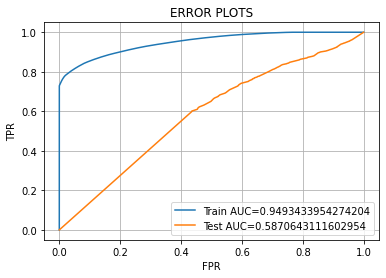

In [302]:
from sklearn.metrics import roc_curve,auc

train_fpr1,train_tpr1,tr_thresholds1=roc_curve(Y_train,Y_predict_train)
test_fpr1,test_tpr1,te_thresholds1=roc_curve(Y_test,Y_predict_test)
plt.plot(train_fpr1,train_tpr1,label='Train AUC='+str(auc(train_fpr1,train_tpr1)))
plt.plot(test_fpr1, test_tpr1,label='Test AUC='+str(auc(test_fpr1,test_tpr1)))
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ERROR PLOTS')
plt.grid()
plt.show()

In [303]:
from sklearn.metrics import confusion_matrix

best_t1=find_best_threshold(tr_thresholds1,train_fpr1,train_tpr1,1)

print("Train confusion matrix")
print(confusion_matrix(Y_train,predict_with_best_t(Y_predict_train,best_t1)))

print("Test confusion matrix")
predict1=predict_with_best_t(Y_predict_test,best_t1)
print(confusion_matrix(Y_test,predict_with_best_t(Y_predict_test,best_t1)))

The maximum value of tpr*(1-fpr) 0.7752936883371128 for threshold 0.833 for set 1
Train confusion matrix
[[ 7725   507]
 [ 7886 37482]]
Test confusion matrix
[[ 1789  2265]
 [ 6529 15817]]


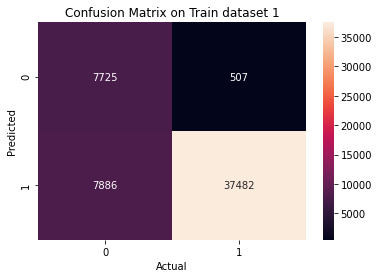

In [304]:
ax=sns.heatmap(np.array(confusion_matrix(Y_train,predict_with_best_t(Y_predict_train,best_t1))),annot=True,fmt="")
ax.set(xlabel='Actual',ylabel='Predicted')
ax.set_title('Confusion Matrix on Train dataset 1')
plt.show()

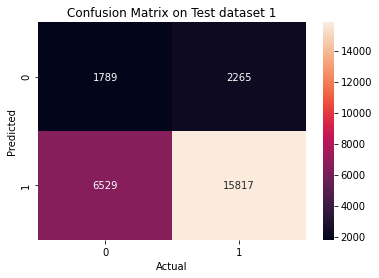

In [308]:
ax=sns.heatmap(np.array(confusion_matrix(Y_test,predict_with_best_t(Y_predict_test,best_t1))),annot=True,fmt="")
ax.set(xlabel='Actual',ylabel='Predicted')
ax.set_title('Confusion Matrix on Test dataset 1')
plt.show()

#Results:

In [310]:
from prettytable import PrettyTable

table=PrettyTable()
table.field_names=['Vectorizer','Model','Best Max Depth','Best min sample split','AUC']

table.add_row(['TFIDF','Decision Tree','10','500','0.63'])
table.add_row(['TFIDF W2V','Decision Tree','10','500','0.61'])
table.add_row(['TFIDF with Feature importance','Decision Tree','-','500','0.58'])

print(table)

+-------------------------------+---------------+----------------+-----------------------+------+
|           Vectorizer          |     Model     | Best Max Depth | Best min sample split | AUC  |
+-------------------------------+---------------+----------------+-----------------------+------+
|             TFIDF             | Decision Tree |       10       |          500          | 0.63 |
|           TFIDF W2V           | Decision Tree |       10       |          500          | 0.61 |
| TFIDF with Feature importance | Decision Tree |       -        |          500          | 0.58 |
+-------------------------------+---------------+----------------+-----------------------+------+
